# Computando Derivadas Numéricas

Lembro que uma aplicação $f: A \to \mathbb{R}$ é **derivável** em $A \cap A'$ se, e só se o limite

$$ \lim_{x \to x_0; x \in A \setminus \{x_0\}} \frac{f(x) - f(x_0)}{x - x_0}$$

converge para um número real $L$. Essa interpretação remete à ideia de velocidade instantânea.

Lembro que a velocidade média de uma partícula $v(t)$ é aproximadamente igual à velocidade instantânea se olharmos para variações infinitesimais de distância, ou seja, se a partícula se desloca $x(t) - x(t_0)$ com $t \approx t_0$, então $v(t)$ converge para a velocidade instantânea.

Ok, mas computar derivadas analiticamente nem sempre é uma opção. Como já dissemos antes, computadores tradicionais trabalham apenas com **informação discretizada**.

Proponhamos a seguinte expressão alternativa para a derivada:

$$f'(x) \approx \frac{f(x+h) - f(x)}{h} \quad (h > 0, h \approx 0)$$

Se $h$ é finito e positivo, mas suficientemente pequeno, então a expressão acima aproxima "bem" a derivada analítica. De fato, note que:

$$f(x + h) = f(x) + f'(x)h + \frac{f}''(x)}{2!} \cdot h^{2}$$

Essa expressão pode ser facilmente reescrita como:

$$f'(x) = \frac{f(x+h) - f(x)}{h} + \mathcal{O}(h)$$,

pois a série dos termos de ordem $n \geq 2$ é em módulo no máximo um múltiplo positivo de $h$. Isto mostra que a nossa expressão proposta converge linearmente para o valor verdadeiro da derivada.

Se facilita sua vida, pode pensar que estamos olhando para a inclinação de uma secante que corta o gráfico de $f$ em $f(x)$ e em $f(x + h)$; tomando $h$ bem pequeno, essa secante se aproxima da tangente ao gráfico, quando existir, no ponto $x$. A derivada, como sabemos, pode ser escrita como a inclinação da reta tangente ao gráfico.

### Implementação da Derivada Numérica

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def forward_difference(func, x, h=1e-6):
    
    """
    Implements numeric differentiation by using the forward first difference.
    
    Parameters:
    
    func: a function
    x: a float object
    
    Options:
    
    h: an upper bound on the approximation error
    """
    
    num = func(x + h) - func(x)
    
    den = h
    
    return num / den

### Exemplo:

Tome $f: [0, \pi] \to \mathbb{R}$ dada por $f(x) = \sin(x)$.

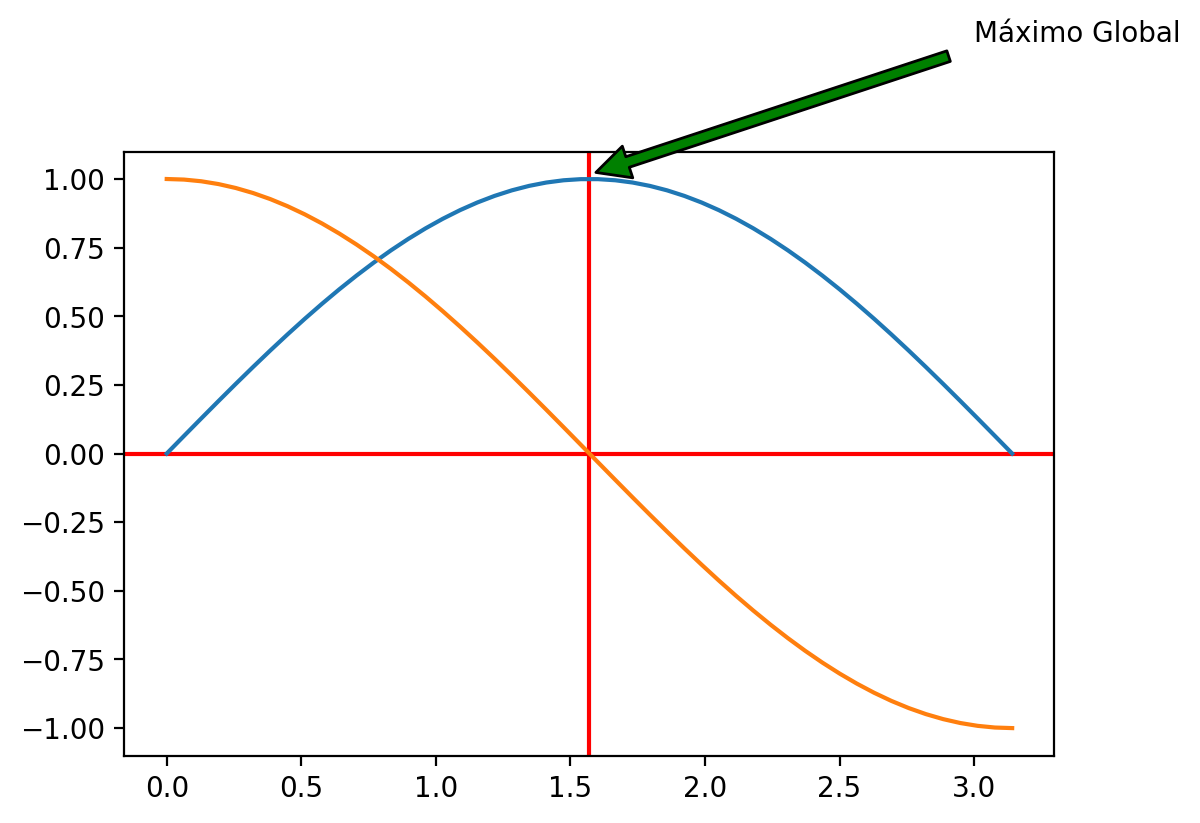

In [3]:
plt.rcParams['figure.dpi'] = 200

#Definindo funções.
x = np.linspace(0, np.pi)
y = np.sin(x)
z = np.cos(x)

#Demarcando semi-espaços.
plt.axhline(color='r')
plt.axvline(x=np.pi/2, color='r')

#Administrivia.
plt.annotate('Máximo Global', xy=(np.pi/2 - 0.05, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='green', shrink=0.05),
             )

#Plotando.
plt.plot(x, y)
plt.plot(x, z)

Note que a derivada se anula quando a função atinge um máximo global. Ela é positiva no trecho crescente da função e negativa no trecho decrescente.

In [4]:
forward_difference(lambda x: np.sin(x), np.pi / 2) #Numericamente zero.

-5.000444502911705e-07

In [5]:
forward_difference(lambda x: np.sin(x), 1) #Positiva, pois seno ainda cresce.

0.5403018851213304

In [6]:
forward_difference(lambda x: np.sin(x), 2) #Negativa, pois seno decresce.

-0.41614729129335615

# Uma Divagação (Ignorar antes da prova, só ler depois)

Uma aplicação $f: I \to I$ onde $I$ (onde $I$ é um intervalo) é dita **unimodal** se for suave (ao menos $\mathcal{C}^{2}$) com um único ponto crítico $c$ interior a $I$ que é também um ponto de máximo. Exemplo abaixo.

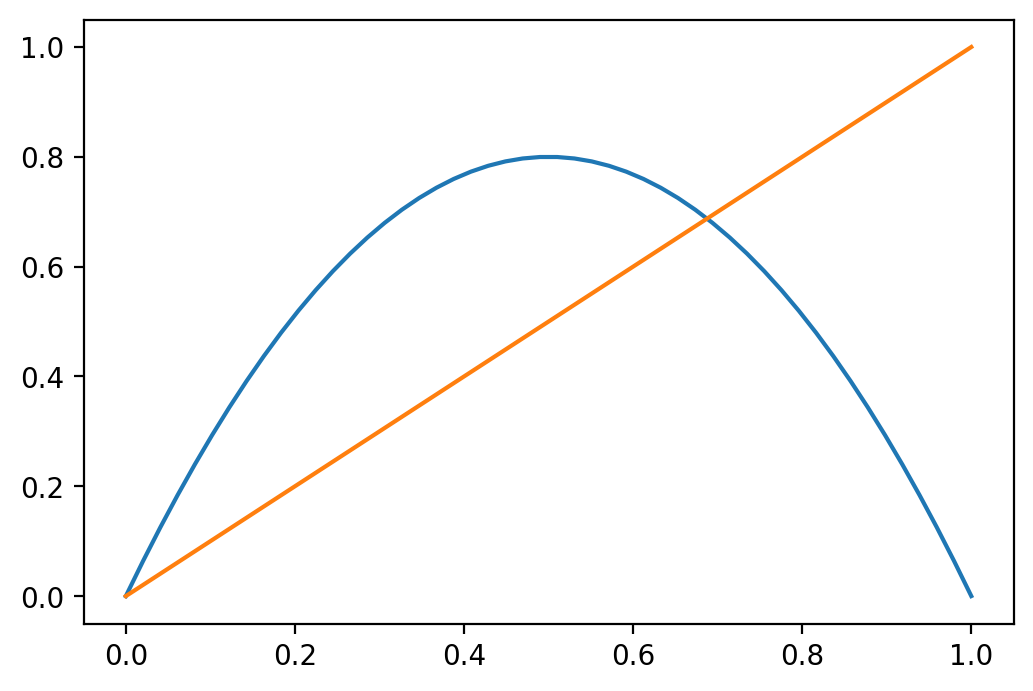

In [7]:
plt.rcParams['figure.dpi'] = 200

x = np.linspace(0, 1)
y = -3.2*(x - 0.5)**2 + 0.8
z = x

plt.plot(x, y)
plt.plot(x, z)

In [8]:
x0 = 0.5
i = 0
color_range = np.arange(0, 1, 0.01)

trajectory_x = []
trajectory_y = []

while i < 100:
    
    trajectory_x.append(x0)
    
    x0 = -3.2*(x0 - 0.8)**2 + 0.8
    
    trajectory_y.append(x0)
    
    i = i + 1

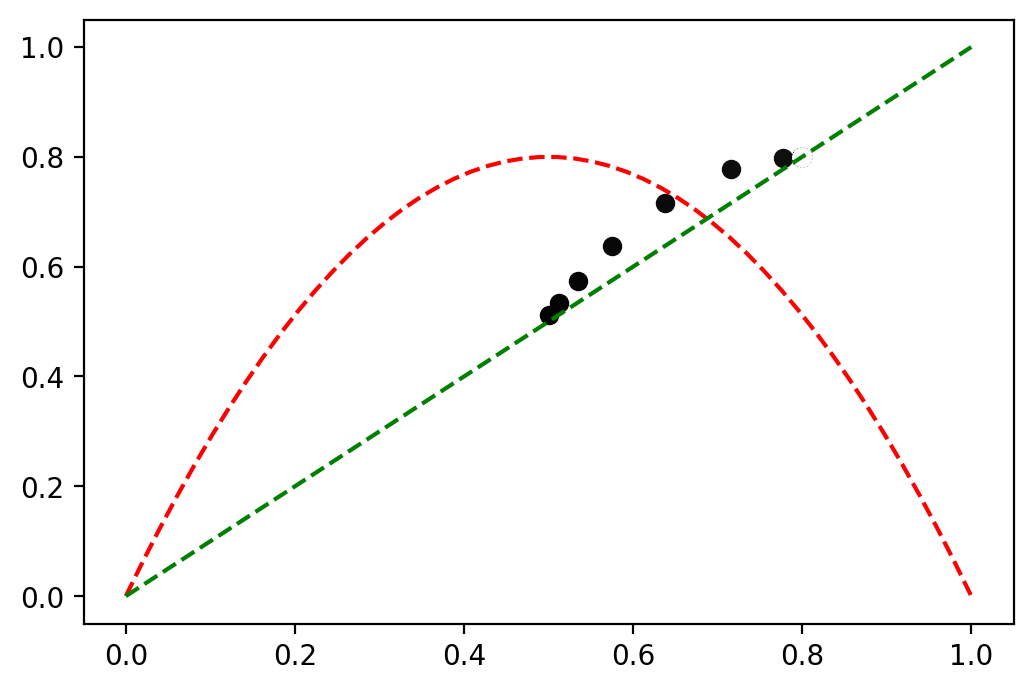

In [9]:
plt.rcParams['figure.dpi'] = 200

for i, j, color in zip(trajectory_x, trajectory_y, color_range):
    plt.scatter(i, j, c=f'{color}')
    
plt.plot(x, y, 'r--')
plt.plot(x, x, 'g--')

$f^{n}(x_0)$ converge para $0.8$ quando tomamos $x_0 = 0.5$

Um **sistema dinâmico** será algo mais ou menos assim: dado um $x_0$ em $I$, olhamos para a família de iteradas de uma aplicação $f$, ou seja, olhamos para $x_0, f(x_0), f^{2}(x_0), ...$ e, em seguida, nos perguntamos: será que isso converge para algum lugar? O que podemos falar sobre o comportamento dessa família?

# O Algoritmo de Newton-Raphson 

Quero encontrar um zero da função $f: [a, b] \to \mathbb{R}$, partindo de um **único chute**, $x_0$. Peço que $f$ seja derivável em todo o domínio, o que já evidencia dois *shortcomings* do método:

- Ele requer que computemos derivada, o que é bem caro.
- Ele impões condições muito fortes sobre $f$.

A melhor aproximação linear de $f$ ao redor de $x_0$ é dada por $f(x_0) + f'(x_0) \cdot (x - x_0)$. É justamente a reta tangente ao gráfico de $f$ no ponto $x_0$. Assim, temos:

$$f(x) \approx f'(x_k) \cdot x + f(x_k) - f'(x_k) \cdot x_k$$

Digamos que $x_{k+1}$ é um zero da função. Então $f(x_{k+1}) = 0$. Daí:

$$f'(x_k) \cdot x_{k+1} + f(x_k) - f'(x_{k}) \cdot x_k = 0$$

donde:

$$x_{k+1} \cdot f'(x_k) = f'(x_{k}) \cdot x_{k} - f(x_k)$$

e, **contanto que seja** $f'(x_{k}) \neq 0$, vem:

$$x_{k+1} = x_{k} - \frac{f(x_k)}{f'(x_k)}$$

Mais problemas ficam claros aqui:

- Se $f'(x_k) = 0$, o método quebra.
- Se $|f'(x_k)|$ for pequeno comparado a $|f(x_k)|$, então o paso é tão grande que a próxima aproximação pode ser pior ainda (o método diverge). Você pode tentar corrigir isso escalando o passo.
- Uma terceira e última possibilidade é que as iterações formem um ciclo de período finito (fica pulando de $\overline{x}$ pra $\underline{x}$, digamos).

In [10]:
def bad_newton(func, x0, eps=1e-6, maxiter=10, h=1):
    
    i = 0
    
    while abs(func(x0)) > eps and i < maxiter:
        
        i = i + 1
        
        x0 = x0 - h * (func(x0) / forward_difference(func, x0))
        
        print(f'Passo {i}: {x0}')

    if i >= maxiter:
        
        return 'Deu ruim.'
    
    else:
        
        return x0

In [11]:
bad_newton(lambda x: x**2 - 1, -2532563456)

Passo 1: -1279852975.7916672
Passo 2: -639999991.556204
Passo 3: -303157895.18125236
Passo 4: -155874707.0230357
Passo 5: -78985706.10684198
Passo 6: -39499998.70686468
Passo 7: -19749999.99999999
Passo 8: -9859350.237717934
Passo 9: -4933590.637528534
Passo 10: -2467773.049816108


'Deu ruim.'

In [12]:
bad_newton(lambda x: x**2 - 1, 0.1)

Passo 1: 5.049975250528917
Passo 2: 2.6239982520834166
Passo 3: 1.5025482473302818
Passo 4: 1.084042279421361
Passo 5: 1.003257799825962
Passo 6: 1.0000052910188448
Passo 7: 1.0000000000166425


1.0000000000166425